### Импорт необходимых модулей

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline     
import pandas as pd             
import seaborn as sns           
import sklearn   

### Название

### Информация о датасете

### Описание

In [2]:
path = 'codon_usage.csv'
raw_data = pd.read_csv(path, low_memory=False)

### Размерность

In [3]:
raw_data.shape

(13028, 69)

Датасет содержит **13028** строк и **69** столбцов.

Начало таблицы

In [4]:
raw_data.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [5]:
raw_data.index

RangeIndex(start=0, stop=13028, step=1)

### Обзор столбцов

In [6]:
raw_data.columns

Index(['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'],
      dtype='object')

#### Найдём уникальные значения в толбце Kingdom

In [7]:
unique_values = raw_data.Kingdom.unique()
print(f"Уникальные значения в столбце Kingdom: {unique_values}\nКоличество уникальных значений: {unique_values.size}")

Уникальные значения в столбце Kingdom: ['vrl' 'arc' 'bct' 'phg' 'plm' 'pln' 'inv' 'vrt' 'mam' 'rod' 'pri']
Количество уникальных значений: 11


**Итого**: 11 классов для задачи классификации

### Описание столбцов
- **Kingdom** - царство, код из трёх букв вида: xxx (arc - археи, bct - бактерии, plm - плазмиды, inv - беспозвоночные, mam - млекопитающие, pln - растения, pri - приматы, rod - грызуны, vrt - позвоночные, phg - бактериофаги, vrl - вирусы)
- **DNAType** - тип ДНК, обозначается целым числом для геномного состава вида: 0 - геномный, 1 - митохондриальный, 2 - хлоропласт, 3 - цианелла, 4 - пластида, 5 - нуклеоморф, 6 - вторичный эндосимбионт, 7 - хромопласт, 8 - лейкопласт, 9 - значение недоступно, 10 - пропластид, 11 - апикопласт и 12 - кинетопласт.
- **SpeciesID** - целое число, уникальный идентификатор вида
- **Ncodons** - число кодонов представляет собой алгебраическую сумму чисел, перечисленных для различных кодонов. Частоты кодонов нормализованы к общему количеству кодонов, поэтому количество появлений, разделенное на «Ncodons», представляет собой частоты кодонов, перечисленные в файле данных. 
- **SpeciesName** - название вида представлено в виде строк. Это описательная метка для интерпретации данных. 
- **UUU, UUC, UUA ... UGA** - частоты кодонов, представлены числами с плавающей запятой (точность 5 знаков)

Требуется определить принадлежность вида к определённому царству по частоте встречаемости кодонов в его ДНК.

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

Тип данных для столбцов UUU и UUC был определён неверно, выясняем причину (ищем нечисловые значения)

In [9]:
pd.isnull((raw_data[["UUU", "UUC"]].apply(pd.to_numeric, errors = 'coerce'))).sum()

UUU    2
UUC    1
dtype: int64

Находим и заменяем нестандартные данные

In [10]:
def invalid_to_nan(data, columnIndex):
    for index, value in data[columnIndex].items():
        try:
            float(value)            
        except ValueError:
            print(f"column: {columnIndex} index: {index}, value: {value}")
            data.loc[index, columnIndex] = np.nan

In [12]:
data = raw_data.copy()

invalid_to_nan(data, "UUU")
invalid_to_nan(data, "UUC")

column: UUU index: 486, value: non-B hepatitis virus
column: UUU index: 5063, value: 12;I
column: UUC index: 5063, value: -


In [21]:
data['UUU'] = data['UUU'].astype('float64')
data['UUC'] = data['UUC'].astype('float64')
data['Kingdom'] = data['Kingdom'].astype('category')

Результат преобразований

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13026 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Kingdom      13026 non-null  category
 1   DNAtype      13026 non-null  int64   
 2   SpeciesID    13026 non-null  int64   
 3   Ncodons      13026 non-null  int64   
 4   SpeciesName  13026 non-null  object  
 5   UUU          13026 non-null  float64 
 6   UUC          13026 non-null  float64 
 7   UUA          13026 non-null  float64 
 8   UUG          13026 non-null  float64 
 9   CUU          13026 non-null  float64 
 10  CUC          13026 non-null  float64 
 11  CUA          13026 non-null  float64 
 12  CUG          13026 non-null  float64 
 13  AUU          13026 non-null  float64 
 14  AUC          13026 non-null  float64 
 15  AUA          13026 non-null  float64 
 16  AUG          13026 non-null  float64 
 17  GUU          13026 non-null  float64 
 18  GUC          13026 non-nul

Удаляем пропущенные данные

In [15]:
data.dropna(inplace=True)

### Анализ классов

In [23]:
data['Kingdom'].value_counts()

bct    2919
vrl    2831
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

Классы несбалансированны

## Визуализация

In [24]:
data.describe()

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13026.000000,13026.000000,1.302600e+04,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,...,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000,13026.000000
mean,0.367265,130443.036926,7.961776e+04,0.024818,0.023440,0.020637,0.014104,0.017821,0.018287,0.019045,...,0.005453,0.009930,0.006423,0.024181,0.021164,0.028291,0.021683,0.001640,0.000590,0.006179
std,0.688764,124777.067741,7.197556e+05,0.017628,0.011598,0.020710,0.009280,0.010587,0.014573,0.024252,...,0.006601,0.008574,0.006388,0.013826,0.013039,0.014343,0.015019,0.001785,0.000882,0.010345
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28851.250000,1.602000e+03,0.013910,0.015380,0.005610,0.007102,0.010890,0.007830,0.005302,...,0.001220,0.001690,0.001170,0.012390,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.929000e+03,0.021750,0.021905,0.015260,0.013360,0.016130,0.014560,0.009680,...,0.003530,0.009270,0.004545,0.025425,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222890.500000,9.120000e+03,0.031307,0.029210,0.029495,0.019807,0.022730,0.025110,0.017255,...,0.007150,0.015928,0.010250,0.034190,0.027690,0.036800,0.031127,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.217300,0.091690,0.151330,0.101190,0.089780,0.100350,0.163920,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


<AxesSubplot:xlabel='Kingdom', ylabel='count'>

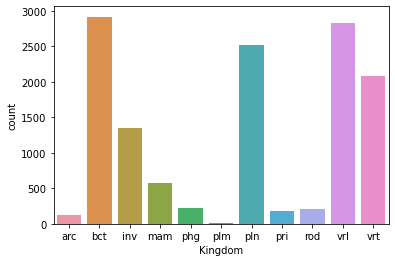

In [25]:
sns.countplot(x = data['Kingdom'])

Выбираем столбцы с числовыми значениями

In [26]:
columns = [columnIndex for columnIndex in list(data) if data[columnIndex].dtype != object]

Строим гистограмму для каждого из столбцов

<Figure size 1440x1440 with 0 Axes>

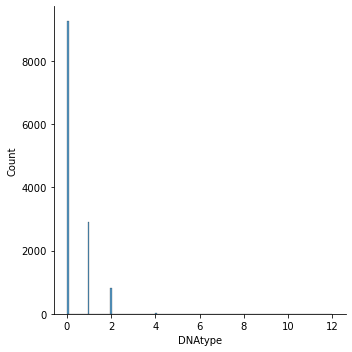

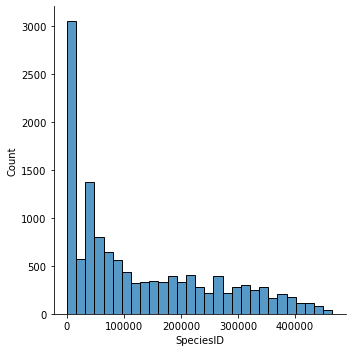

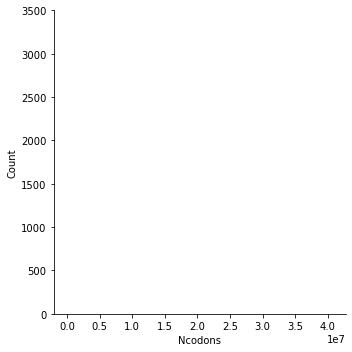

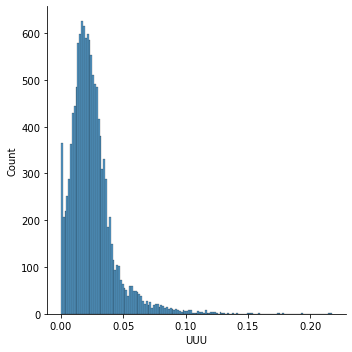

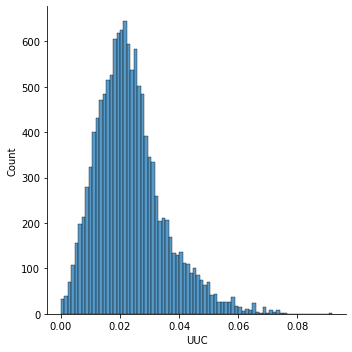

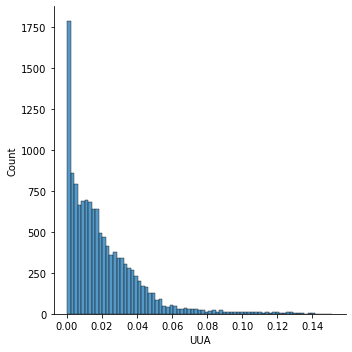

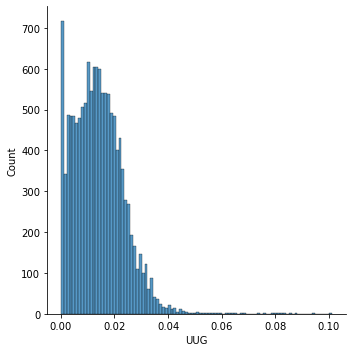

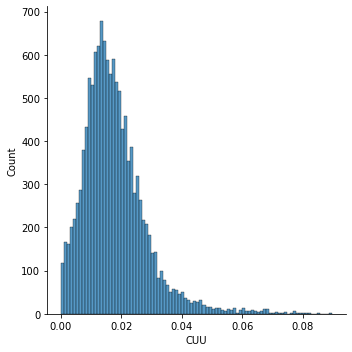

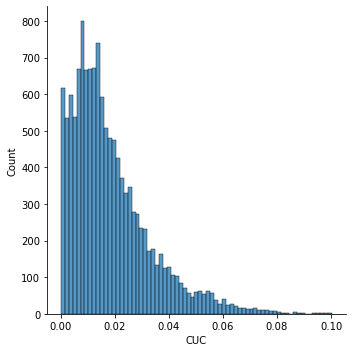

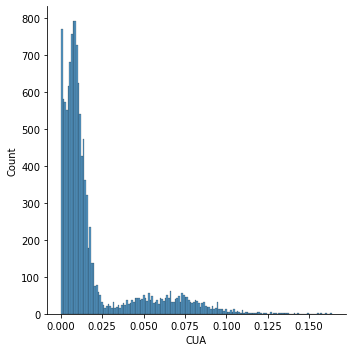

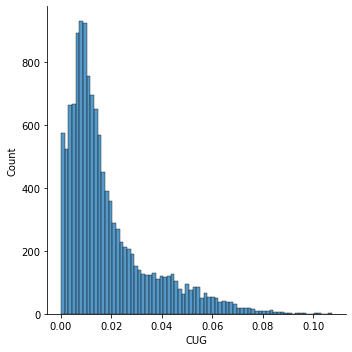

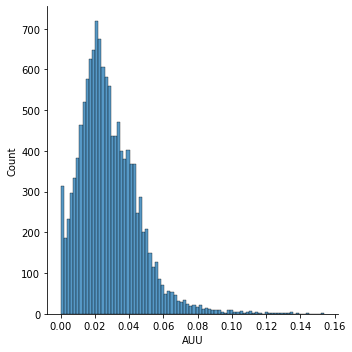

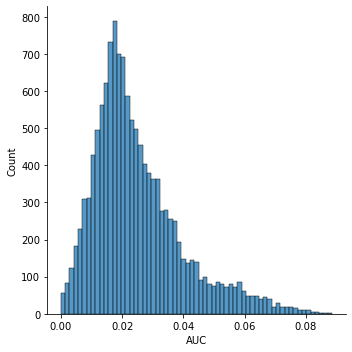

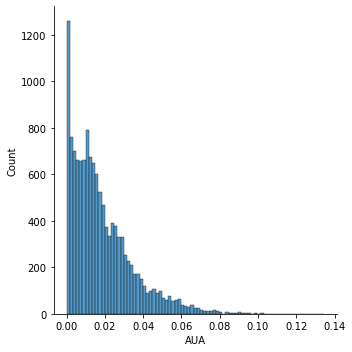

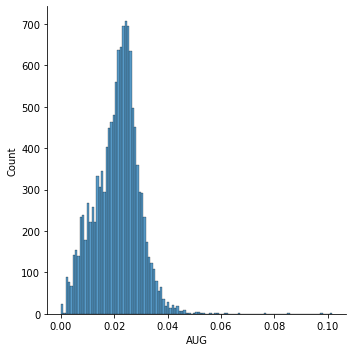

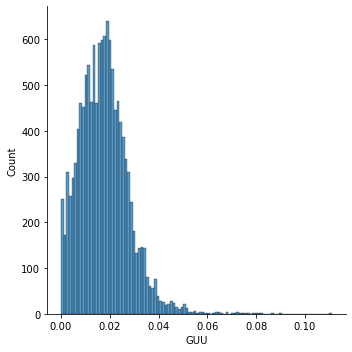

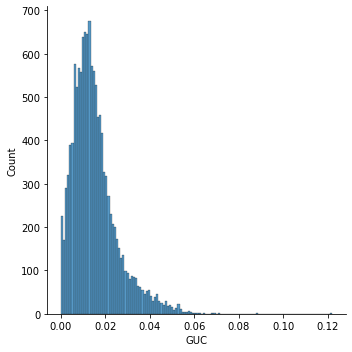

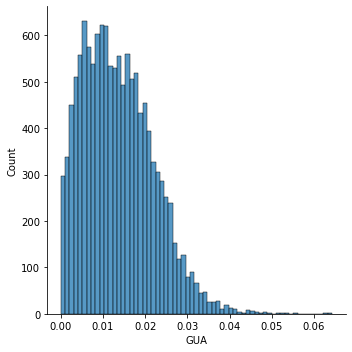

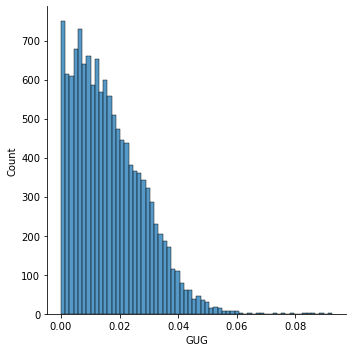

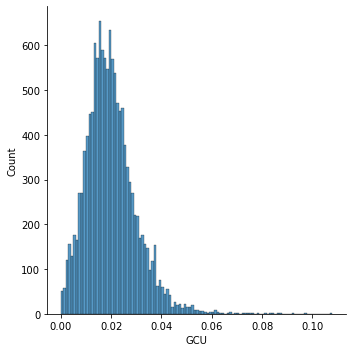

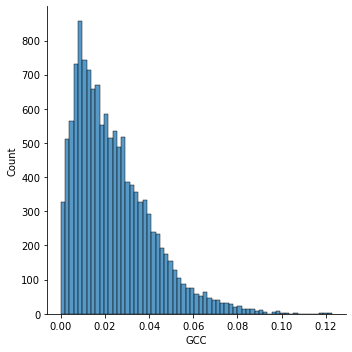

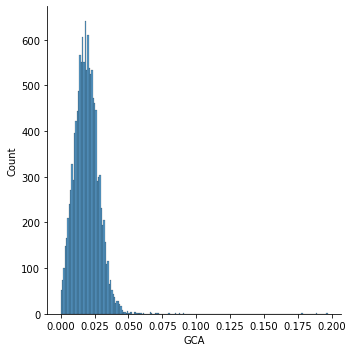

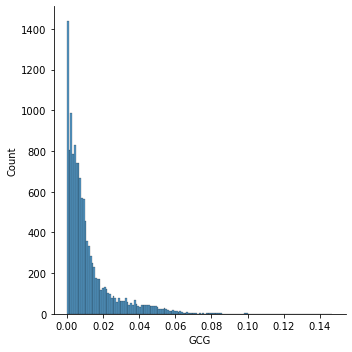

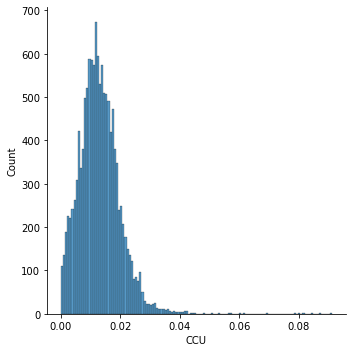

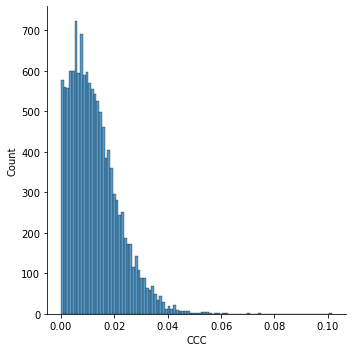

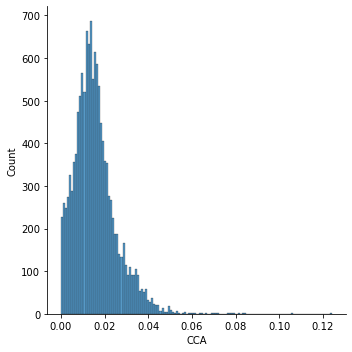

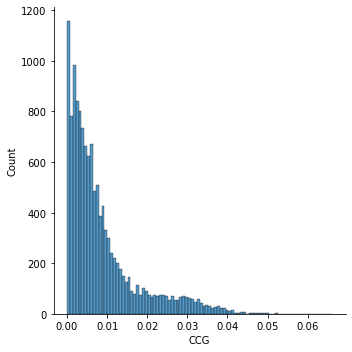

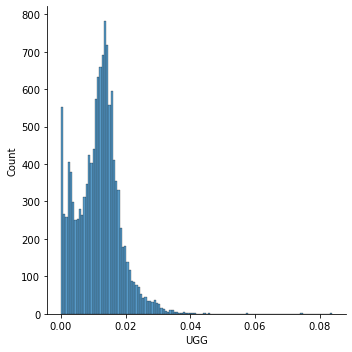

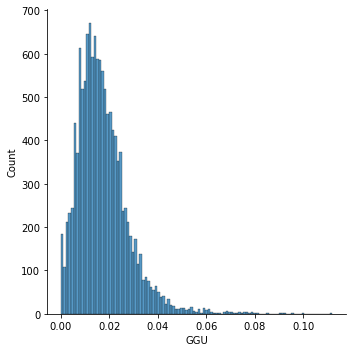

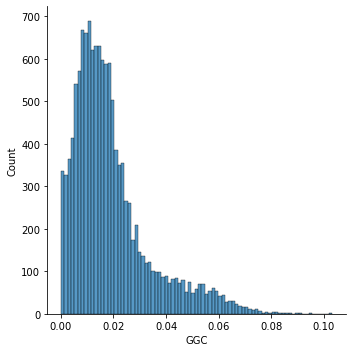

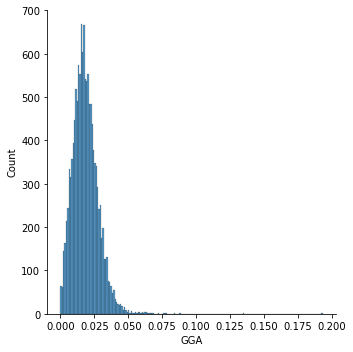

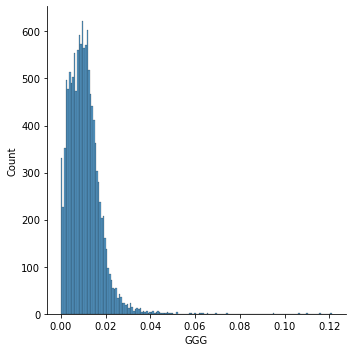

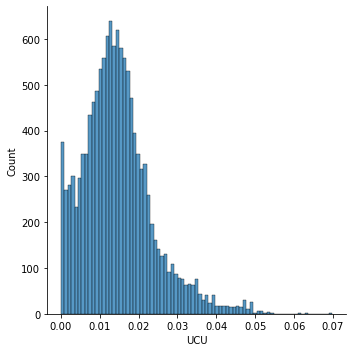

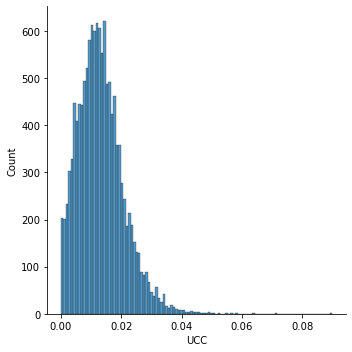

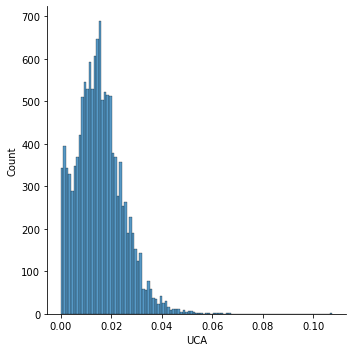

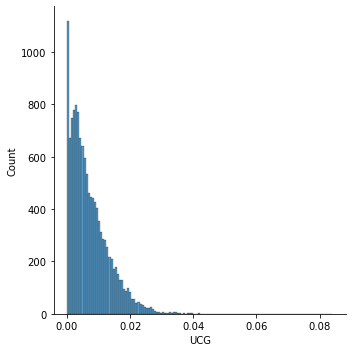

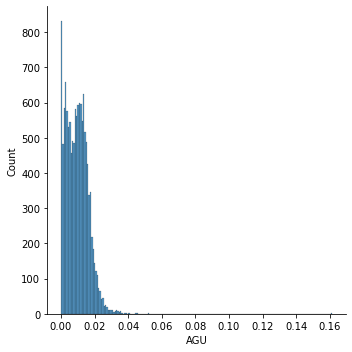

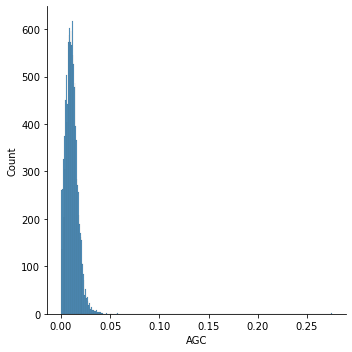

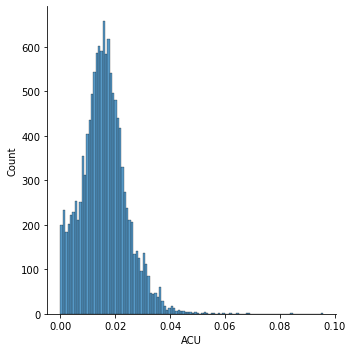

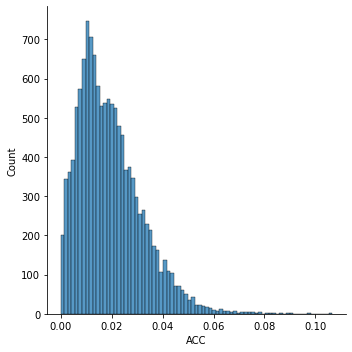

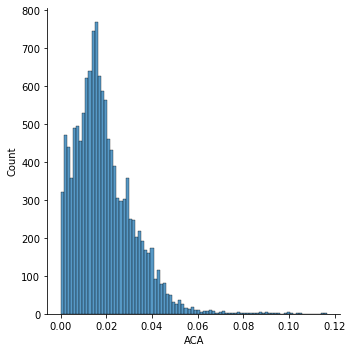

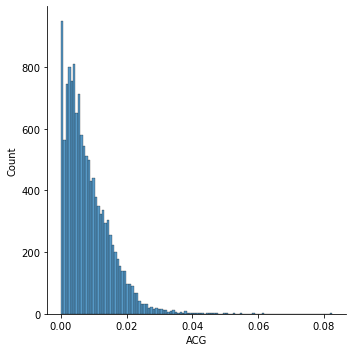

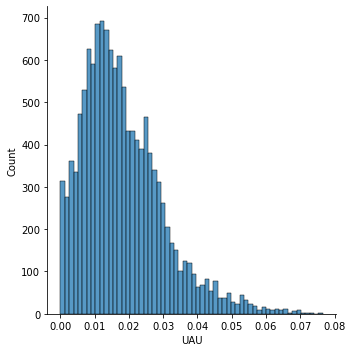

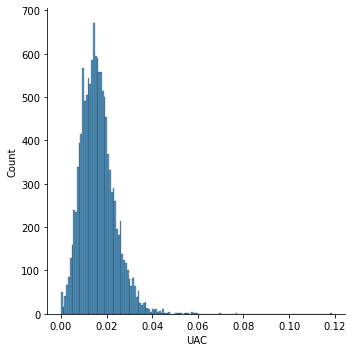

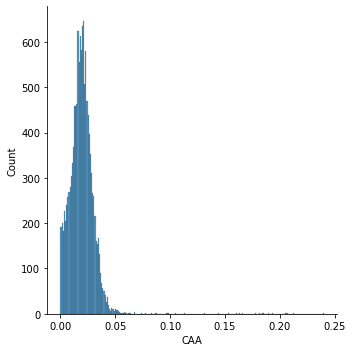

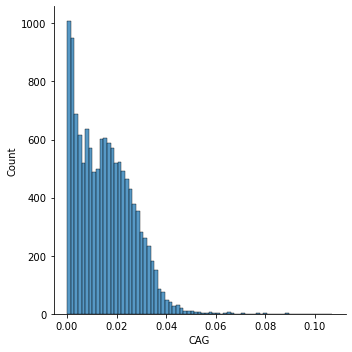

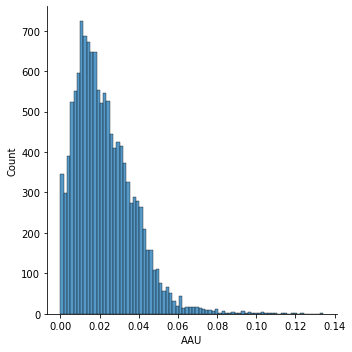

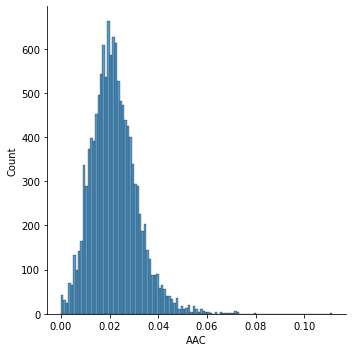

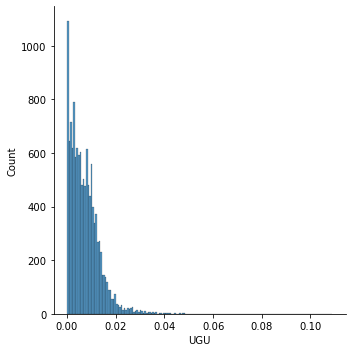

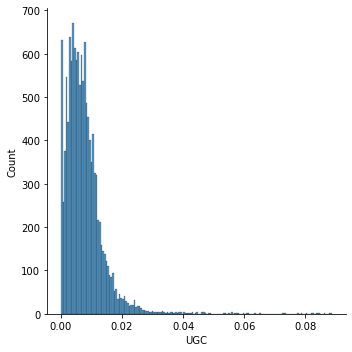

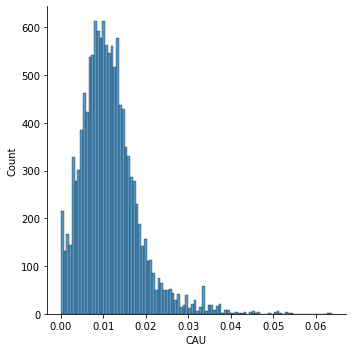

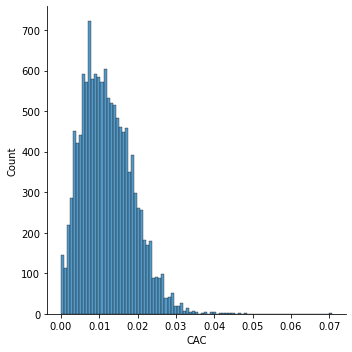

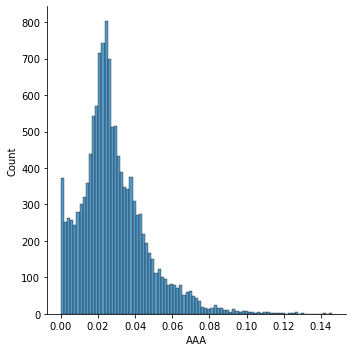

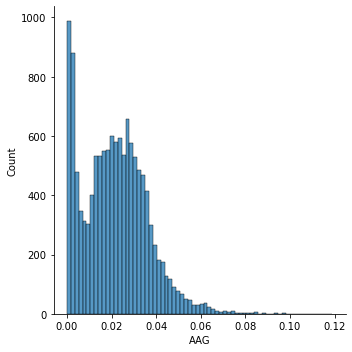

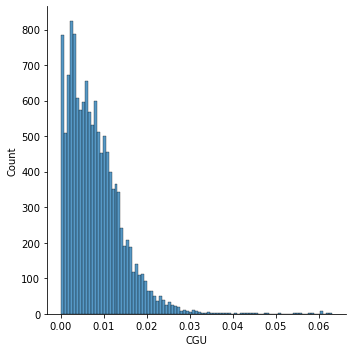

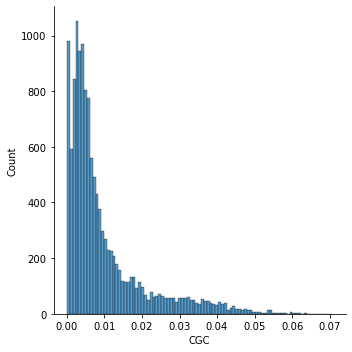

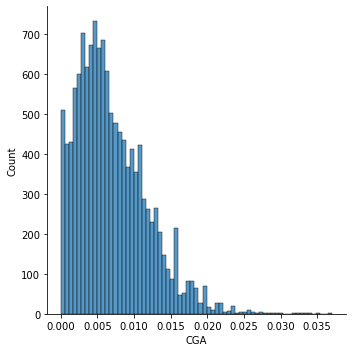

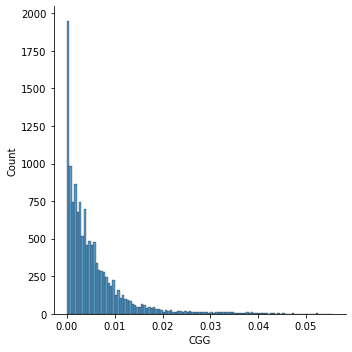

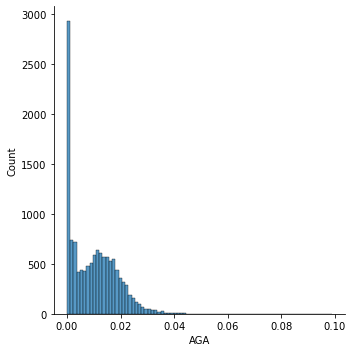

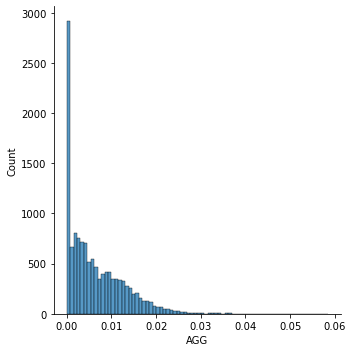

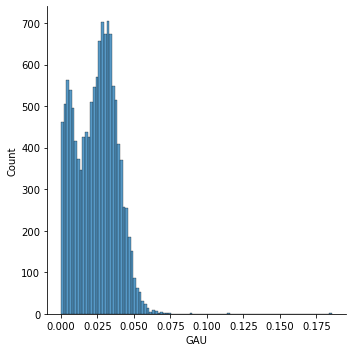

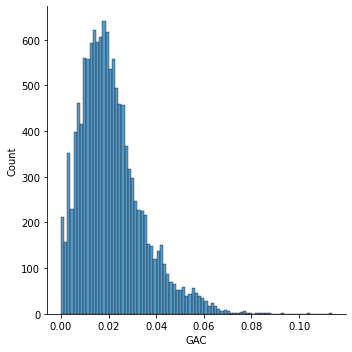

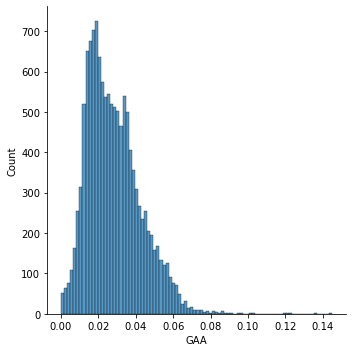

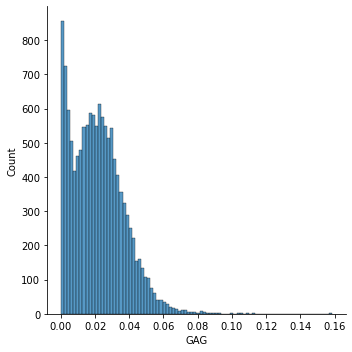

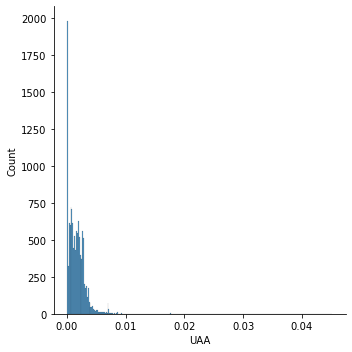

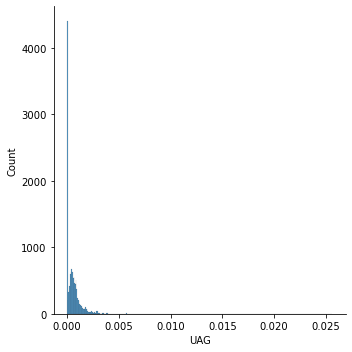

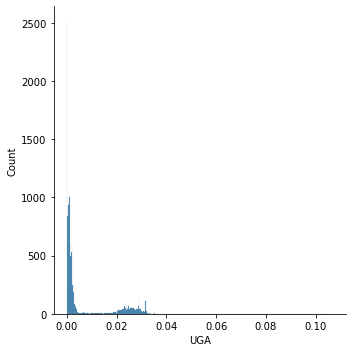

In [20]:
plt.figure(figsize = (20, 20))

for column in columns:
    sns.displot(data[column])
    plt.show() 

<AxesSubplot:xlabel='Kingdom', ylabel='Ncodons'>

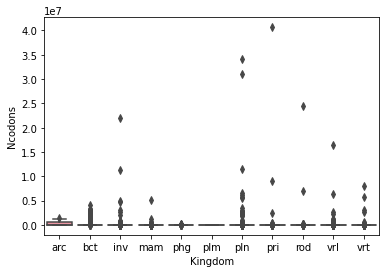

In [37]:
sns.boxplot(x="Kingdom", y="Ncodons", data=data)

Вычислим матрицу корреляции

In [38]:
corr_mat = data.corr()
corr_mat

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
DNAtype,1.000000,-0.020640,-0.053879,0.456980,0.192249,0.460152,-0.039334,0.379466,0.067437,0.459086,...,-0.218565,-0.085942,-0.324659,-0.273814,-0.459354,-0.100704,-0.497575,0.127694,-0.029474,0.458548
SpeciesID,-0.020640,1.000000,0.051613,0.020128,-0.016753,0.025724,-0.047719,0.055947,0.022104,0.051161,...,0.011032,-0.026455,-0.000325,-0.005531,-0.028843,-0.014235,-0.079169,0.047551,-0.012775,0.050224
Ncodons,-0.053879,0.051613,1.000000,-0.035149,-0.028125,-0.033717,0.009490,-0.040632,-0.001748,-0.049958,...,0.068370,-0.011014,0.001487,0.024802,0.034606,0.028573,0.053025,-0.026614,0.003666,-0.047967
UUU,0.456980,0.020128,-0.035149,1.000000,-0.354082,0.761457,0.337784,0.312873,-0.433270,0.022340,...,-0.343592,0.303696,-0.104940,0.163590,-0.598978,0.154148,-0.452514,0.161928,0.008330,0.154603
UUC,0.192249,-0.016753,-0.028125,-0.354082,1.000000,-0.293159,-0.391935,0.035671,0.601362,0.485254,...,0.023974,-0.469387,-0.195680,-0.569606,0.198702,-0.464552,-0.079001,-0.014834,-0.046422,0.441262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAA,-0.100704,-0.014235,0.028573,0.154148,-0.464552,0.188393,0.315429,-0.027955,-0.532901,-0.286736,...,-0.228076,0.476832,0.046406,0.684575,-0.218457,1.000000,-0.085183,0.077904,-0.019749,-0.401986
GAG,-0.497575,-0.079169,0.053025,-0.452514,-0.079001,-0.577687,0.115326,-0.430747,0.013362,-0.592600,...,0.524382,0.057028,0.477531,0.120198,0.673025,-0.085183,1.000000,-0.289654,0.004050,-0.582579
UAA,0.127694,0.047551,-0.026614,0.161928,-0.014834,0.263108,-0.131228,0.168447,0.014521,0.237438,...,-0.251603,0.020084,-0.157417,-0.067414,-0.292131,0.077904,-0.289654,1.000000,0.136464,0.276992
UAG,-0.029474,-0.012775,0.003666,0.008330,-0.046422,0.009545,0.053581,0.010373,-0.009295,-0.031165,...,-0.001665,0.050122,0.085691,-0.010064,-0.053819,-0.019749,0.004050,0.136464,1.000000,0.007000


<AxesSubplot:>

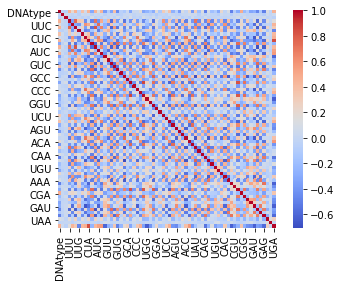

In [39]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

In [40]:
corr_mat > 0.5

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
DNAtype,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SpeciesID,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Ncodons,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
UUU,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
UUC,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAA,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
GAG,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
UAA,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
UAG,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [42]:
data.isna().sum().any()

False